In [37]:
import numpy as np

In [38]:
# OSEMN chapter
import csv

# using numpy to retrieve a np.array
data = np.loadtxt('populations.txt')

# reading a text file
file_name = "/home/lrizzi17/LaboratoryOfComputationalPhysicsA/data/magic04.data"

with open(file_name, mode = 'r') as f:
    # print the entire line
    for line in f:
        print(line)
        
with open(file_name, mode = 'r') as f:
    # an alternative if it is a csv file with a delimiter
    # csv.reader takes as input f, which is basically a collection of array of strings
    for line in csv.reader(row for row in f if not row.startswith('#')): 
        print(line)
    


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [39]:
# PANDAS chapter
import numpy as np
import pandas as pd

# a pandas series is basically a 1d np.array with an index (a tuple!). A glorified dictionary
# Syntax: xs = pd.Series( 1darray , index = tuple() )
d = {'b' : 1, 'a' : 'cat', 'c' : [2,3]}
xs = pd.Series(np.arange(10)*0.5, index=np.arange(10))
# or xs = pd.Series(d)
# access only the indexes/values   
(type(xs.values))   # this is a np.array
(type(xs.index))    # this is not a np.array, for some reasons
# access a certain value given an index (similar to dictionary)
xs[ 2 ] 
xs[ [2,3] ]  #using a list, basically. Returns a portion of the series!!!!!
# same operations as np.1darray. They'll return a series as well
xs[1:3]
xs[::-1]
xs = xs[xs.index%2 == 0]


# operations on timeSeries align data:
s = pd.Series(np.random.randn(5), index=np.arange(5))
s = s[1:] + s[:-1]  #if missing data, then panda will simpy output NaN. Panda automatically align data
s            # the first and last output will be put as NaN


# more often than not, pd.Series are used when index is a time index. Two tools that must be combined
import datetime as dt
type(dt.date.today())    #print the date. This is a datetime.date Object!
date = dt.datetime(2024,12,23,12,49)
# But the most useful, a range of timestamps
days = pd.date_range(date, periods=7, freq='D')
seconds = pd.date_range(date, periods=3600, freq='s')   #this will output a DatetimeIndex that can be used in a pd.Series
tseries = pd.Series(np.random.normal(10, 1, len(seconds)), index=seconds)
tseries


# DATAFRAME
# a multi-dimensional pd.Series, basically.
# a similar syntax: a np.array as values, a np.array/list/datetimeIndex as index and labels
df = pd.DataFrame(np.random.normal(0,2,(7,4)), index = days, columns = ["A", "B", "C", "D"])
# or using a dict, but whatever

# visualization/accessing
df.tail(3)
df.head(3)
df.index   # return the index (can be a DatetimeIndex, IndexObject)
df.values  # returns the matrix (numpy array)
#indexing/slicing
df["A"] #return the corresponsing pd.Series. Using, thus, a label (NOT AN INDEX)!
df[0:3] #slice through the rows 
df[::-1]

#loc uses indexing through the indexes (and eventually labels)
# df.loc[ index , label ]
df.loc[days[0]]   # this outputs a row, whereas df[label] outputs a columns. Output: a pd.Series(values at days[0], index = labels)
df[0:1]           # this is analogous, but outputs still a DataFrame
df.loc[:,['A','B']]  #all of the rows, but just the two columns
df.loc[days[1], "A"] # a single value specified by index and label

#iloc uses position, instead (of the index! and of the label)
# df.iloc[ n.index, n.label ]
df.iloc[0]  #equivalent to df.loc[df.index[0]]
df.iloc[3:5, 1]  #equivalent to df.loc[ df.index[3:5], df.label[1] ]
df.iloc[:,3] = 1 #setting using i loc

#masking
df[df["B"] > 0] #select only the rows for which the values of B is greater than 0. MASKING ON COLUMN
df[df > 0]     # masking on everything, putting NaN where necessary

# adding new columns/label and applying a function
df["E"] = pd.Series(np.arange(0,7), index = df.index)
df["E"] = df["E"].apply(np.cos)

#dropping a column or a row via its label. Different behaviour because python sucks
df = df.drop(columns = "E")
df = df.drop(df.index[0])

# OPERATIONS.

#mean, as with numpy
df.mean(axis = 1)  #axis 0 is on the columns/labels, axis 1 is on the rows/indexes. This is a pd.Series
df.apply(lambda x: x +1) #act on all values, but this is not a setter!
df = df.apply(lambda x: x +1) #this is a setting statement


# GROUPING

#grouping means clustering all values of a pd.DataFrame based on one of the columns and performing some operation on them
data = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'B', 'A', 'C'],
    'Values': [10, 20, 30, 40, 50, 60]
})
data2 = pd.DataFrame({
    'Category': ['A', 'B', 'A', 'B', 'A', 'C'],
    'Values': [10, 20, 30, 40, 50, 60],
    'Val': [1,2,3,4,5,6]
})

# this is a useless object
data.groupby("Category")
grouped_data = data.groupby("Category").sum() # this is a new DataFrame. As index, it used the unique values of column "Category"
                                              # Then all the other values are summed up based on the column. 
                                              # It will output a pd.DataFrame n.of cols x n.of operations
grouped_data = data2.groupby('Category').agg(['sum', 'mean'])
grouped_data = data2.groupby('Category').mean() # this will simpy create a new DataFrame. What if I wanted to just instantiate a new column?
# that's the syntax (a weird one, indeed)
data["Avg on Val"] = data.groupby("Category")["Values"].transform("mean")
# filtering by grouping. Eliminates categories for which a certain transformation on the column fails. THIS WILL JUST CREATE A DATAFRAME
# where the correct rows are deleted (based on the value "Category" and on a function of its concerning values)
filtered = data.groupby('Category').filter(lambda x : x['Values'].mean() > 40)
filtered

,Category,Values,Avg on Val
5,C,60,60.0


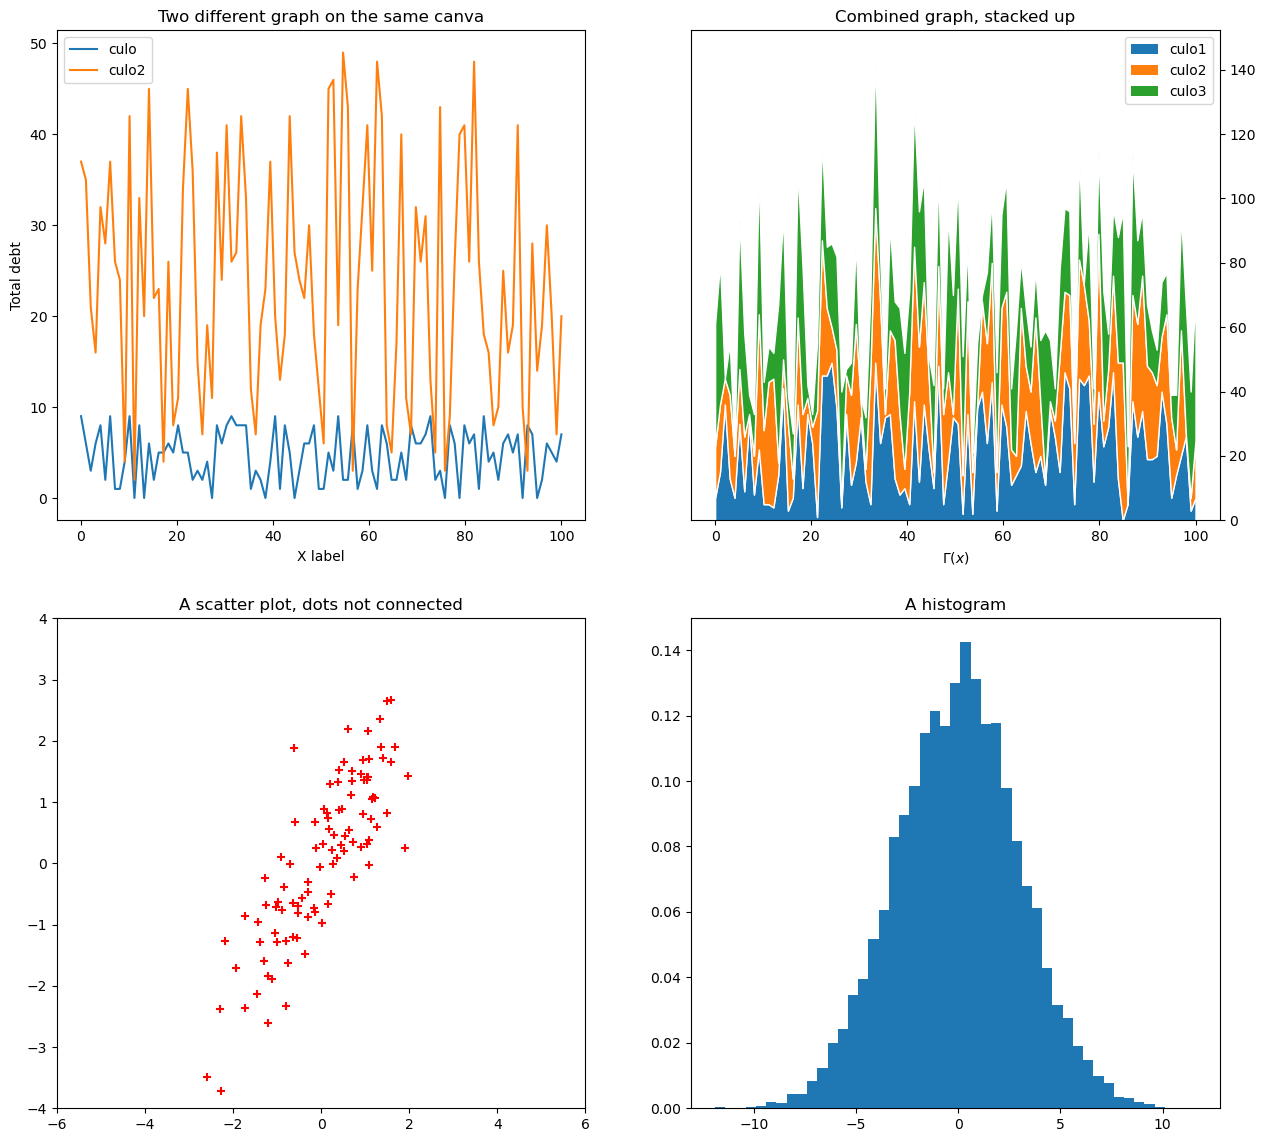

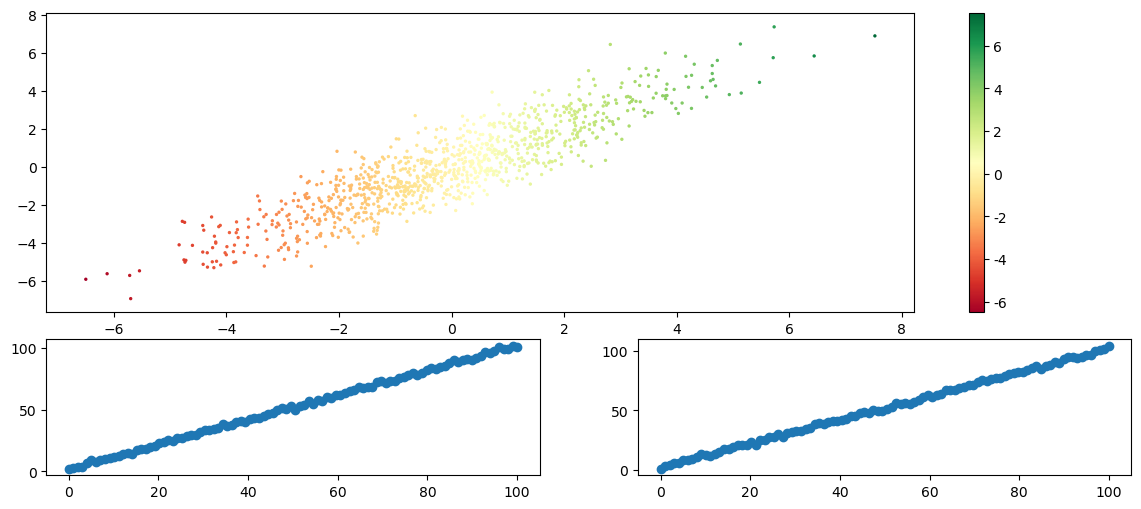

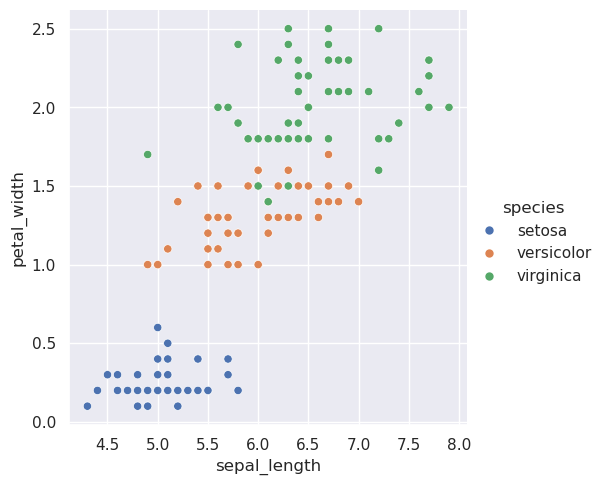

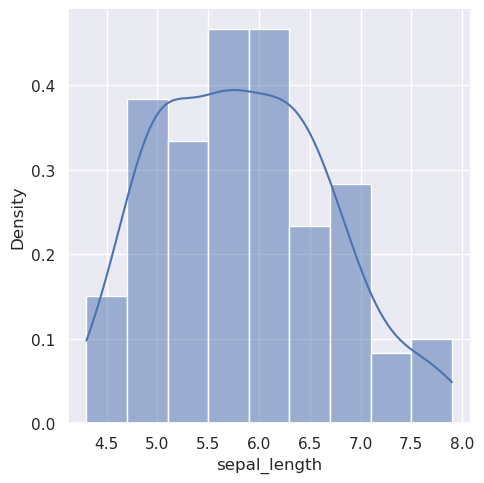

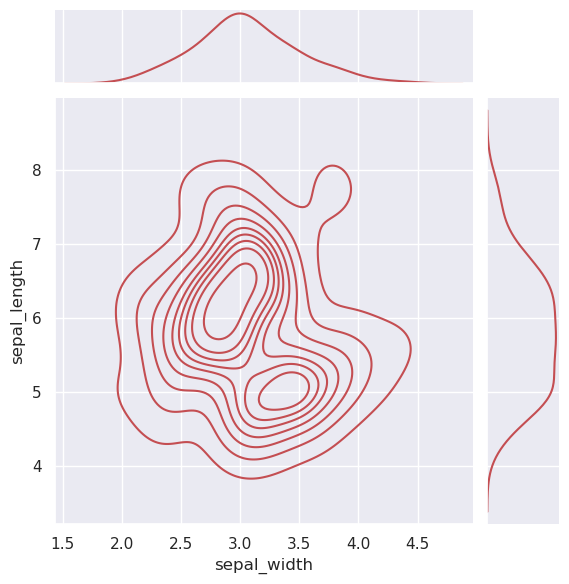

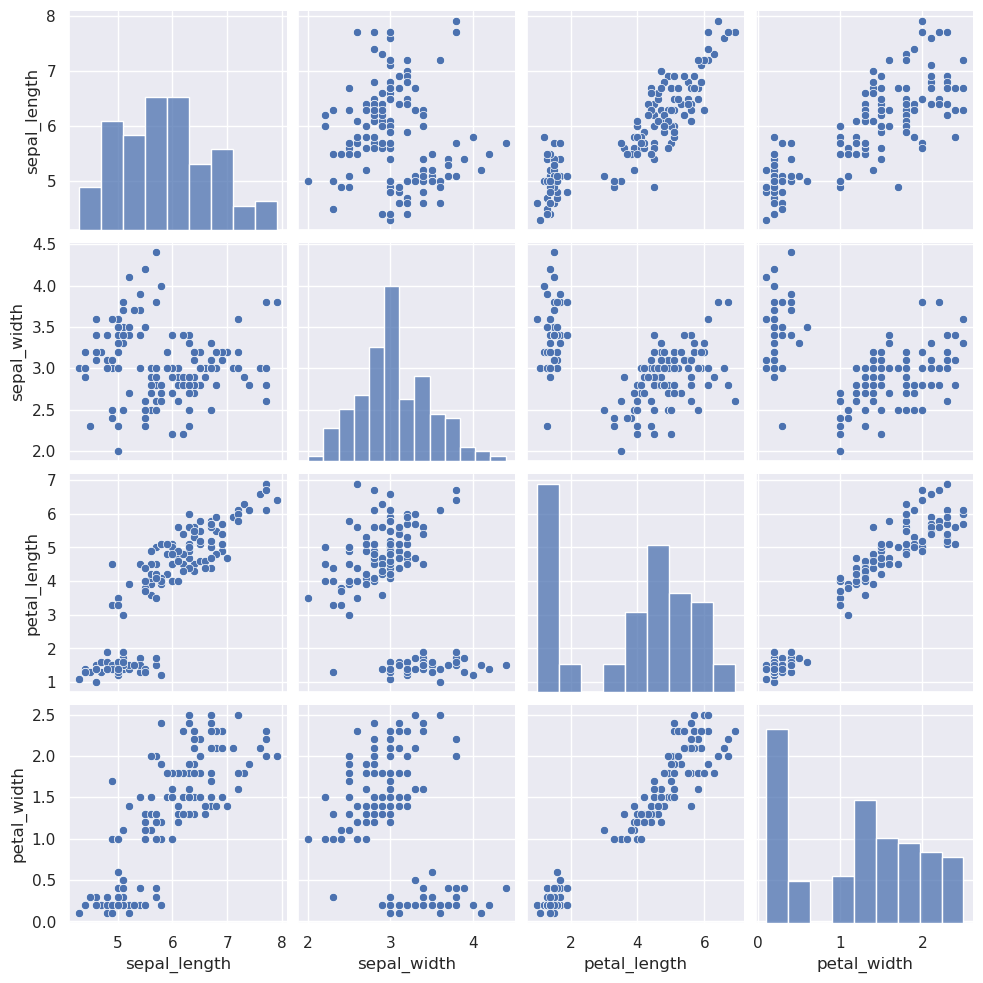

In [114]:
## MATPLOTLIB.PYPLOT


import matplotlib.pyplot as plt

# OOP : Figure is the ensemble, Axes are the individual plot
fig, ax = plt.subplots(ncols = 2, nrows = 2, figsize=(15,14))

ax[0,0].plot(np.linspace(0,100,100), np.random.randint(0,10, 100), label = "culo")
ax[0,0].plot(np.linspace(0,100,100), np.random.randint(0,50, 100),label = "culo2")
ax[0,0].set_title('Two different graph on the same canva')
ax[0,0].legend(loc='upper left')
ax[0,0].set_ylabel('Total debt')
ax[0,0].set_xlabel("X label")

# they are summed up
ax[0,1].stackplot(np.linspace(0,100,100), np.random.randint(0,50, size=(3,100)), labels = ["culo1", "culo2", "culo3"]  )
ax[0,1].set_title("Combined graph, stacked up")
ax[0,1].legend(loc = "upper right")
ax[0,1].set_xlabel("$\Gamma(x)$")
ax[0,1].yaxis.tick_right()

# a scatter plot (not a time series, but well...). Basically dots are not connected
x = np.random.normal(0,1,100)
ax[1,0].scatter(x = x, y =x+ np.random.normal(0,0.8,100), color = "r", marker = "+")
ax[1,0].set_title("A scatter plot, dots not connected")
ax[1,0].set_xlim( -6, 6)
ax[1,0].set_ylim(-4,4)

data = np.random.normal(0,3,10000)
ax[1,1].hist(data, bins = np.arange(data.min(), data.max(),0.5), density=True)   #
ax[1,1].set_title("A histogram")
#plt.tight_layout
#plt.show()


## USING SUBPLOT2GRID: we are more free to adapt the canva's size

fig2 = plt.figure(figsize= (14,6))
gridsize = (3, 2)

ax1 = plt.subplot2grid((3,2), (0, 0), colspan=2, rowspan=2)
x = np.random.normal(0,2,1000)
scatter = ax1.scatter(x = x, y =x+np.random.normal(0,1,1000) , c = x, cmap='RdYlGn', s = 2)
plt.colorbar(scatter, ax=ax1, format='%d')

ax2 = plt.subplot2grid((3,2), (2,0), colspan=1, rowspan=1)
ax2.scatter(np.linspace(0,100,100), np.linspace(0,100,100)+np.random.normal(2, 1, 100))

ax2 = plt.subplot2grid((3,2), (2,1), colspan=1, rowspan=1)
ax2.scatter(np.linspace(0,100,100), np.linspace(0,100,100)+np.random.normal(2, 1, 100))
#plt.show()


# SEABORN !!

#those first two lines of code are pretty much obiquitous
import seaborn as sns
sns.set(style="darkgrid")

# rel plot uses a pd.DataFrame which is much more convenient
dataset = sns.load_dataset("iris")
sns.relplot(data = dataset, x = "sepal_length", y = "petal_width", hue = "species")
#displot draws a histogram for a distribution. It can automatically perform normalization
sns.displot(dataset["sepal_length"], kde = True, stat = "density")
# or perform a joint plot
sns.jointplot(dataset, x = "sepal_width", y = "sepal_length", kind = "kde", color = "r")
# systematic perform correlation plot
sns.pairplot(dataset)

In [58]:
# LINEAR ALGEBRA

# Scipy is the most useful python library when it comes to scientific computing.
# Scipy.linear algebra works fine with numpy's array
import numpy as np
from scipy import linalg as la

v = np.array([3,4,5])
w = np.array([1,6,2])

norm = la.norm(v-w)
prod = v.dot(w)
outer = np.outer(v,w)

# covariance. If we have a non standard matrix where rows = features, columns = measures, them
data = np.random.random((10,4))
np.cov(data.T)      #because the order is different here

M = np.random.random((5,5))
la.det(M)
M.trace()
la.inv(M)

# MATRIX DECOMPOSITION: LU decomp
P, L, U = la.lu(M)
# P is a pivoting matrix which basically tells us how to reorder the rows of the matrix. It can be used:
M_ord = np.dot(P.T, M)

# EIGENDECOMPOSITION. If det(A) not 0
L, V = la.eig(M)              # V is the change of basis matrix: M = V L V.T  (an orthogonal matrix). Its columns are the eigenvectors of M
np.real_if_close(L)

# LINEAR SYSTEMS
x = la.solve(M,np.array([1,2,3,4,5]))  #syntax: la.solve(A, b): Ax = b

# PCA (principal component analysis)

array([ 180.66438452,  294.38394457, -266.37391607, -401.46063214,
        772.41907953])

In [135]:
# ALGORITHMS / SCIPY
import numpy as np
from scipy.interpolate import interp1d
from scipy import optimize
from scipy.optimize import brentq
from scipy.optimize import newton
from scipy import stats
from scipy.integrate import quad, quadrature
import matplotlib.pyplot as plt

# Interpolations: 
times = np.linspace(0,10, 10)
data = np.sin(times)
interpolated_data = interp1d(times, data, kind = "quadratic")    #this is a special PyObject, that can be used as an actual function
# kind = linear, cubic, quadratic, next


# Optimization and fitting: curve_fit()
x_data = np.linspace(-5, 5, num=50)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=50)

def prior(x, A, w):
    return A*np.sin(w*x)
par, par_cov = optimize.curve_fit(prior,x_data, y_data, p0 = [2,2])



# Root of equations
def f(x):
    return x**3-3*x+1

# this only spits out THE FIRST ROOT on the selected interval (because of how the algorithm work)
zero = brentq(f,-3,3)
zero = newton(f,0)   # Newton algorithm, needs only a value

# Minimization:
sol = optimize.minimize_scalar(f, method = "bounded", bounds = [-1,1])
# note that if the function oscillates a lot, this method could not yield a global minimum as a result. You can thus inspect various interval
# and select the np.min result


# Statistics and fitting pdf
gaussian_fun = stats.norm.pdf  # a gaussian function
# if the data belong to a pdf, we can estimate using a maxlikelihood similar method
mean, std = stats.norm.fit(np.random.normal(size=10000))


# Numerical integration. Two different functions, quad and quadrature (FORTRAN based, the last one being deprecated)
integral, error = quad(gaussian_fun, -30,30)